In [1]:
# Initial imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from imblearn.over_sampling import SMOTE

# Needed for visualisation
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Read the dataset file with the Pandas 
dataset_df = pd.read_csv("../Outputs/Dataset/Employee_attrition.csv")

# Display the dataframe
dataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [3]:
# Encode categorical variables
for column in dataset_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_df[column] = le.fit_transform(dataset_df[column])
   

In [4]:
# Display the dataset after encoding
dataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,0,1,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,1,1,0,1,...,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,1,...,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,4,1,3,0,...,0,0,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,0,3,1,6,3,2,2,2,2,2


In [5]:
# Define features set
X = dataset_df.copy()
X = X.drop(columns= ['Attrition'],axis=1)
X.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,0,1,0,8,0,0,6,4,0,5
1,49,1,279,1,8,1,1,0,1,61,...,1,3,1,10,3,2,10,7,1,7
2,37,2,1373,1,2,2,4,3,1,92,...,0,2,0,7,3,2,0,0,0,0
3,33,1,1392,1,3,4,1,3,0,56,...,0,0,0,8,3,2,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,0,3,1,6,3,2,2,2,2,2


In [8]:
# Define target vector
y = dataset_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [9]:
# Balance the Dataset
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0    1233
1     237
Name: count, dtype: int64

After Smoote Attrition
1    1233
0    1233
Name: count, dtype: int64


## Splitting the dataset

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote.ravel(), random_state=1)


## Scaling Features

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameters Tuning

In [12]:
# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=1)

In [13]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
    'penalty': ['l1', 'l2'],  # Regularization technique
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [14]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [15]:
# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [16]:
# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Creating optimal Random Forest model

In [17]:
# Define optimal model
optimized_logistic_regression_model = LogisticRegression(
    C = best_params['C'],
    max_iter= best_params['max_iter'],
    penalty = best_params['penalty'],
    solver = best_params['solver'],
    random_state = 1
)

## Fitting Random Forest model

In [18]:
# Fitting the model
optimized_logistic_regression_model = optimized_logistic_regression_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [19]:
# Making predictions using the testing data
logistic_regression_predictions = optimized_logistic_regression_model.predict(X_test_scaled)

## Random Forest Evaluation

,Predicted 0,Predicted 1
Actual 0,236,61
Actual 1,77,243


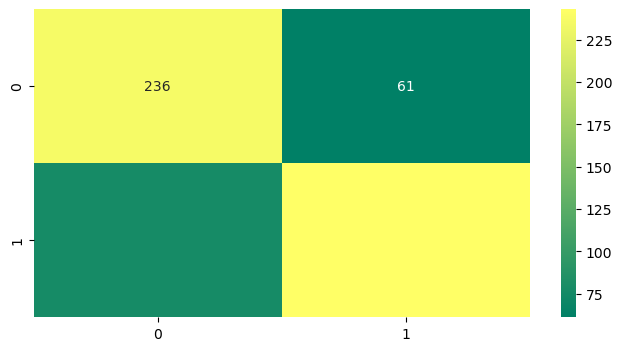

In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, logistic_regression_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

display(cm_df)

plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")


plt.savefig("../Outputs/Machine_Learning_Models/logistic_regression_confusion_matrix.png")

plt.show()

In [21]:
# Calculating the accuracy score
random_forest_accuracy_score = accuracy_score(y_test, logistic_regression_predictions)

print(f"Accuracy Score is: {random_forest_accuracy_score}")

Accuracy Score is: 0.7763371150729336


In [22]:
# Classification Report
random_forest_clas_report = classification_report(y_test,  logistic_regression_predictions)

print("Classification Report")
print(random_forest_clas_report)

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       297
           1       0.80      0.76      0.78       320

    accuracy                           0.78       617
   macro avg       0.78      0.78      0.78       617
weighted avg       0.78      0.78      0.78       617



In [23]:
# Save the model
joblib.dump(optimized_logistic_regression_model, '../Outputs/Machine_Learning_Models/logistic_regression_model.pkl')

['../Outputs/Machine_Learning_Models/logistic_regression_model.pkl']